# Import Library

In [13]:
import tensorflow as tf
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from random import shuffle

# Load Data

In [14]:
data_path = "./Dataset/"

counter = 0

img_rows, img_cols = 224, 224

X, y = [], []

classes = os.listdir(data_path)

for class_path in classes:
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, color_mode="grayscale", target_size=(img_rows, img_cols))
        image = tf.keras.preprocessing.image.img_to_array(image)
        X.append(image)
        y.append(label)
    counter += 1

X = np.array(X)
y = np.array(y)

In [15]:
X = X.astype("float32") / 255.0

x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)

# Modelling

In [16]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation="relu", input_shape=(img_rows, img_cols, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 6)       156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 6)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 conv2d_5 (Conv2D)           (None, 102, 102, 16)      6416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 51, 51, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 41616)            

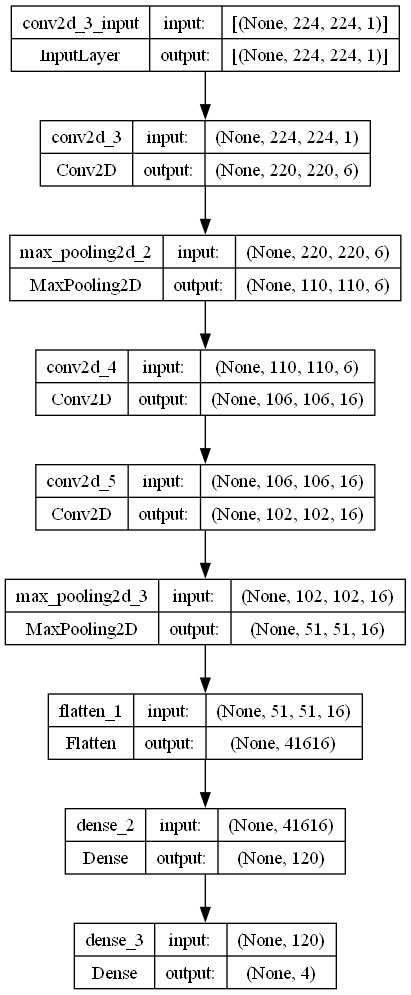

In [18]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

# Training Model

In [19]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=120, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
14/14 [==============================] - 30s 2s/step - loss: 1.5065 - accuracy: 0.2475 - val_loss: 1.3237 - val_accuracy: 0.2500
Epoch 2/10
14/14 [==============================] - 29s 2s/step - loss: 1.2491 - accuracy: 0.3244 - val_loss: 1.0713 - val_accuracy: 0.5800
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.8045 - accuracy: 0.7013 - val_loss: 0.6293 - val_accuracy: 0.7700
Epoch 4/10
14/14 [==============================] - 32s 2s/step - loss: 0.4936 - accuracy: 0.8169 - val_loss: 0.4914 - val_accuracy: 0.8050
Epoch 5/10
14/14 [==============================] - 28s 2s/step - loss: 0.3823 - accuracy: 0.8569 - val_loss: 0.4840 - val_accuracy: 0.8050
Epoch 6/10
14/14 [==============================] - 27s 2s/step - loss: 0.2931 - accuracy: 0.9038 - val_loss: 0.3792 - val_accuracy: 0.8350
Epoch 7/10
14/14 [==============================] - 27s 2s/step - loss: 0.2114 - accuracy: 0.9269 - val_loss: 0.5290 - val_accuracy: 0.7900
Epoch 8/10
14/14 [==

# Evaluate

In [20]:
score = model.evaluate(x_test, y_test)
print (f"Loss: {score[0]}")
print (f"Accuracy: {score[1]}")

7/7 [==============================] - 1s 129ms/step - loss: 0.2917 - accuracy: 0.9050
Loss: 0.2916615605354309
Accuracy: 0.9049999713897705


# Predict

7/7 [==============================] - 1s 110ms/step


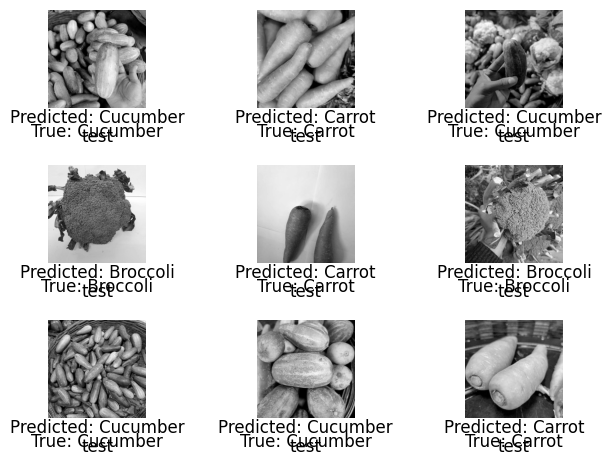

In [ ]:
predictions = model.predict(x_test)
predict_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.axis('off')
  plt.text(0.5, -0.15, f"Predicted: {classes[predict_labels[i]]}", fontsize=12, ha='center', transform=plt.gca().transAxes)
  plt.text(0.5, -0.3, f"True: {classes[true_labels[i]]}", fontsize=12, ha='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

# Plotting

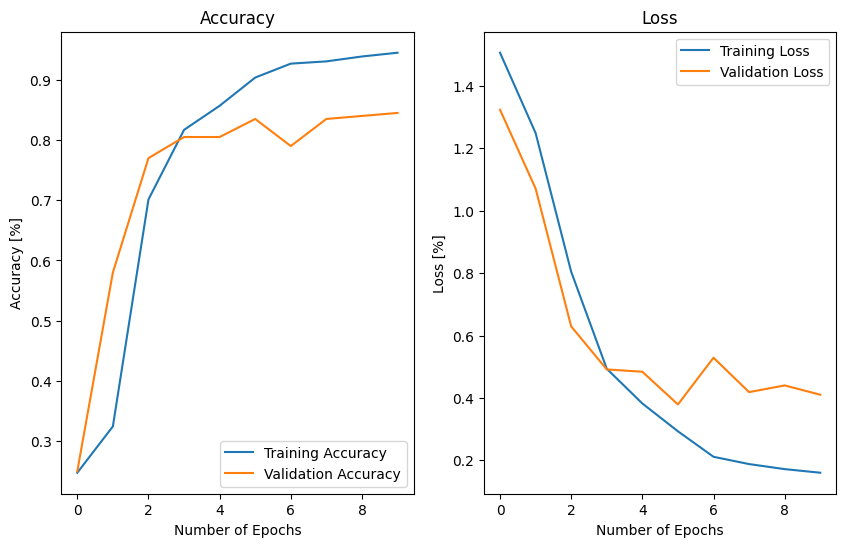

In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss [%]")
plt.title("Loss")
plt.legend()